# Final project

**Due Friday, December 18.**

*Enter your name here*


### Checklist

Before submitting, make sure that your project

- Introduces a computational topic or method  
- Provides background: what kind of problem is this meant to solve?  
- Explains the topic/method: how does it work (in words and possibly in equations, as appropriate)?  
- Provides an example application: if the project is focused on a particular type of problem, where is this problem encountered? If it is focused on a method, in what situations is the method useful?  
- Is similar in depth to one of our shorter homework assignments (e.g., homework 2)  

For the text description, you should feel free to expand on your midterm mini-project. Note that the final **must** include a worked example in Python. For examples of how to do this, look back to the Jupyter notebooks accompanying each lecture from the course. I'd strongly encourage you to not just plot your results at the end, but also to show intermediate results along the way. Here's a (very in depth!) [example](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) using [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine) for classification, to show a different style of organization.

And as always, make sure to

- Fill in your name above  
- Cite any resources that you used while working on this assignment

# Electrostatic Field Solution with Finite Difference Method (FDM)

## 1. Introduction
### 1.a Background
In engineering practice, interaction with electromagnetic field has always to be considered in order to predict a technical device's behaviour realistically. Especially in the design of motos, electromagnets, waveguides or antennas, the simulation of  electromagnetic field is regaded as a main and crucial step. Electromagnetic field controls the behaviour of a device following a set of mathematical rules, which is usually with a complicated boudary condition and sometimes of a non-linear nature. With these difficulties, analytical solution is impossible for almost any situations in reality, and thus numerical simulation are commonly used to give a detailed study.

Two kinds of methods are used universally for numerical calculation of electromagnetic field: [the finite element method (FEM)](https://en.wikipedia.org/wiki/Finite_element_method) and [finite difference method (FDM)](https://en.wikipedia.org/wiki/Finite_difference_method). FEM and FDM both aim to solve [partial differential equation (PDE)](https://en.wikipedia.org/wiki/Partial_differential_equation), which is Maxwell equation in electromagnetic problem. They both use discretisation method to transform a continuous domain into a discrete domain for calculation. In general, FEM performs more efficient and robust than FDM, thus is widely used not only in electromagnetic design but also in the analysis of mechanical, thermal or other type. Some commercial software based on FEM, like [ANSYS](https://www.ansys.com/), provides with us very convenient tools for simulation today. 

However, as a very simple and intuitive method, FDM is still of great importance. On the basis of FDM, [A.Taflove (1980)](http://www.ece.northwestern.edu/ecefaculty/taflove/Paper7.pdf) brought [finite difference time domain (FDTD)](https://en.wikipedia.org/wiki/Finite-difference_time-domain_method) method to use, which extend FDM in time-varying fields. FDTD has become an emerging tool for analysis of electromagnetic wave today, such as wireless communication.


### 1.b Description of problem
Let's start with the static electric field or magnetic field, where the field is not time-varying and the medium is isotropic and lossless. In static field, we can define electric potential $\Phi$ and scalar magnetic potential $\Phi_m$ (we should notice that the scalar magnetic potential is not physical but only used for convenience), so the electric field $E$ and magnetic field $H$ could be expressed as:

$$
E = -\nabla \Phi
$$
$$
H = -\nabla \Phi_m
$$

Therefore, as long as we solved the distribution of potantial, we derive the field. The goven equation of electromagnetic field is Maxwell equation, but since we are focused on potential in static field, we prefer Possion's equation (take electric potential for example):

$$
\nabla^2 \Phi = -\frac{\rho}{\epsilon}
$$

where $\rho$ is density of charge. In the region of our interests, there are no distributed charge or current since we don't care about the source region. We can get Laplace's equation:

$$
\nabla^2 \Phi = 0
$$

In two dimensional rectangular coordinates, it becomes:

$$
\nabla^{2} \Phi_{m}=\frac{\partial^{2} \Phi}{\partial x^{2}}+\frac{\partial^{2} \Phi}{\partial y^{2}}=0
$$

Generally, there are three kinds of boudaries in our region to solve:

$$
\text{Dirichlet boundary condition:} \quad\left.u\right|_{s}=f_{1}(s)
$$
$$
\text{Neumann boundary condition:}\quad \left.\frac{\partial u}{\partial n}\right|_{s}=f_{2}(s)
$$
$$
\text{Robin boundary condition:}\quad\frac{\partial u}{\partial n}+h(u-f_s)=const
$$

where $u$ refers to $\Phi$ or $\Phi_m$. With the boundary condition, we can get the unique solution of potential. Thus our problem can be expressed as **the boundary value problem of Laplace's equation**. 

## 2. Algorithms

### 2.a Basis of FDM

To solve the PDE in a 2-D region, we first divide the region up into a lattice, and then solve for $\Phi$ at each site of the lattice. FDM provides a method to discrete the PDE into finite differential equation for calculation.
<p>
<img align="center" src="figure1.png" title="discretsation of space" width="200"/>
</p>
Suppose the space is divided uniformly with an interval of $h$. From an arbitray site $(x_0,y_0)$ on the lattice (except for boundary), we can get the potential $\Phi$ for left, right, above and below, namely site $1,2,3,4$ respectively. Here we use Taylor expansions:


$$
\left\{\begin{array}{l}
\Phi_{1}=\Phi_{0}+\left(\frac{\partial \Phi}{\partial x}\right)_{0} h+\frac{1}{2 !}\left(\frac{\partial^{2} \Phi}{\partial x^{2}}\right)_{0} h^{2}+\frac{1}{3 !}\left(\frac{\partial^{3} \Phi}{\partial x^{3}}\right)_{0} h^{3}+\cdots \\
\Phi_{3}=\Phi_{0}-\left(\frac{\partial \Phi}{\partial x}\right)_{0} h+\frac{1}{2 !}\left(\frac{\partial^{2} \Phi}{\partial x^{2}}\right)_{0} h^{2}-\frac{1}{3 !}\left(\frac{\partial^{3} \Phi}{\partial x^{3}}\right)_{0} h^{3}+\cdots \\
\Phi_{2}=\Phi_{0}+\left(\frac{\partial \Phi}{\partial y}\right)_{0} h+\frac{1}{2 !}\left(\frac{\partial^{2} \Phi}{\partial y^{2}}\right)_{0} h^{2}+\frac{1}{3 !}\left(\frac{\partial^{3} \Phi}{\partial y^{3}}\right)_{0} h^{3}+\cdots \\
\Phi_{4}=\Phi_{0}-\left(\frac{\partial \Phi}{\partial y}\right)_{0} h+\frac{1}{2 !}\left(\frac{\partial^{2} \Phi}{\partial y^{2}}\right)_{0} h^{2}+\frac{1}{4 !}\left(\frac{\partial^{3} \Phi}{\partial y^{3}}\right)_{0} h^{3}+\cdots
\end{array}\right.
$$

When we make a cutoff at the second order, and by adding $\Phi_1$ and $\Phi_3$ together, we get:
$$
\frac{\partial^{2} \Phi}{\partial x^{2}} = \frac{1}{h^2}(\Phi_1+\Phi_3-2\Phi_0)
$$
In the same way, we have:
$$
\frac{\partial^{2} \Phi}{\partial y^{2}} = \frac{1}{h^2}(\Phi_2+\Phi_4-2\Phi_0)
$$
Using Laplace's equation, we have:
$$
\Phi_0 = \frac{1}{4}(\Phi_1+\Phi_2+\Phi_3+\Phi_4)
$$
So far we have derived the finite differential form of Laplace's equation. The interpration is straightforward: the potential at one site is the average of the four nearest neighbors. For numerical solution, we always start with a guess for the potential and repeated calculation many times to converge. If the total number of site in lattice is n (except for boundary), we will have a set of linear equation of n dimension. We choose to use [successive over-relaxation (SOR)](https://en.wikipedia.org/wiki/Successive_over-relaxation) method to solve this linear system since it's generally more efficient than Jaccobi or G-S method. We write the SOR form of FDM:

$$
\Phi_{i, j}^{(n+1)}=\Phi_{i, j}^{(n)}+\frac{\alpha}{4}\left(\Phi_{i+1, j}^{(n)}+\Phi_{i, j+1}^{(n)}+\Phi_{i-1, j}^{(n+1)}+\Phi_{i, j-1}^{(n+1)}-4 \Phi_{i, j}^{(n)}\right)
$$

where $\alpha$ is relaxation factor, which will affect the rate of convergence. Only for $1<\alpha<2$, the calculation will converge. The convergence of SOR is beyond our disscusion so we just put the conclusion here. The optimal relaxation factor for a square mesh with $N\times N$ sites([Yang and Gobbert, 2009](https://www.sciencedirect.com/science/article/pii/S0893965908001523)) is given by:

$$
\alpha_{o p t}=\frac{2}{1+\sin \pi h}
$$

where $h = \frac{1}{N-1}$

### 2.b Boundary treatment
Up to now, we have discussed the calculation inside the region, but have not deal with those sites on the boundary. The condition on the boundary commonly requires a special treatment. For the first kind of boundary (Dirichlet boundary), we simply apply the boundary value, which we has already known:

$$
\Phi|_s = \Phi(s)
$$

For the second kind of boundary (Neumann boundary) shown as follows:
<p>
<img align="center" src="figure2.png" title="Neumann boundary" width="200"/>
</p>
where we see site 1 is outside, site 3 is inside, and site 0,2,4 are on the boundary, we suppose that site 1 has the same potential as site 3, so that the finite differential form is expressed as:
$$
\Phi_0 = \frac{1}{4}(\Phi_2+2\Phi_3+\Phi_4)
$$
Now we are able to perform our calculation from the boundary and sweep through the region to get the solution.

## 3. Application
### 3.a Example: a slot with charged lid
We start with a classic model: a square metal slot with a charged lid. The bottom and side of the slot is connect to ground. The lid is isolated from the slot and maintained on a potential of 10V.

<p>
<img align="center" src="figure3.png" title="a metal slot with a charged lid" width="200"/>
    <br>
</p>

### 3.b FDM solution
To use FDM, we first roughly divide the space into a $5\times 5$ lattice, process the boundary condition and then perform SOR. For the stopping criteria, we take:

$$
\|x^{(k+1)}-x^{(k)}\|_{\infty}=\max _{1 \leqslant i \leqslant n}\left|x^{(k+1)}_{i}-x^{(k)}_{i}\right| < \epsilon
$$

which means we limit the max error, for example under 0.001.

In [1]:
import numpy as np

dim_grid = 5
alpha = 2/(1+np.sin(3.1416*(1/(dim_grid-1))))
limit = 0.001

All of the boundary is the first kind so we directly set the value. Now we can implement the FDM solver according to the SOR form above.

In [2]:
def fdm_solver(dim_grid, alpha):
    
    # potential to solve with boudary value
    x = np.zeros([dim_grid,dim_grid])
    x[:,dim_grid-1]=10
    x_old = np.zeros([dim_grid,dim_grid])
    
    # error
    e = np.zeros([dim_grid,dim_grid])
    max_e = []
    
    # SOR
    while True:
        for i in range(1,dim_grid-1):
            for j in range(1,dim_grid-1):
                x_old[i,j] = x[i,j]
                x[i,j] = x[i,j]+0.25*alpha*(x[i,j+1]+x[i,j-1]+x[i+1,j]+x[i-1,j]-4*x[i,j])
                e[i,j] = np.abs(x[i,j]-x_old[i,j])
        max_e.append(np.amax(e))

        #criteria
        if max_e[-1] < limit:
            break
    return x,max_e

Let's use the FDM solver to give a solution and take a look at the residual at each step. 

In [3]:
x,max_e = fdm_solver(dim_grid,alpha)
for i in range(len(max_e)):
    print("step:",i+1," residual:",max_e[i])

step: 1  residual: 4.038055116035517
step: 2  residual: 1.5811659556965398
step: 3  residual: 0.8831172064751924
step: 4  residual: 0.4310980985505319
step: 5  residual: 0.18200231884847962
step: 6  residual: 0.015074853474183803
step: 7  residual: 0.006690582240184262
step: 8  residual: 0.0011479608627313898
step: 9  residual: 0.00020337634808875737


The calculation is pretty fast since the dimension we set is small. The solver takes nine step to convergent to the results. However we still want to check if the result is correct. 

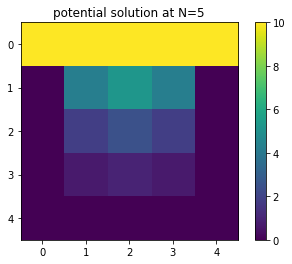

In [4]:
from matplotlib import pyplot as plt

# plot potential
plt.imshow(np.rot90(x)) #rotate to a suitable perspective
plt.title('potential solution at N=5')
plt.colorbar()
plt.show()

This results seems reasonable since the potential is high near the lip, and high near the side and bottom. However, the result is not exact enough because N is too small. We will increase the dimension to 100x100 next to give a fine solution.

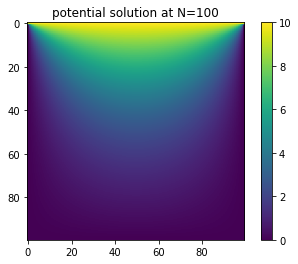

In [5]:
# solve the field at N=100
dim_grid2 = 100
alpha2 = 2/(1+np.sin(3.1416*(1/(dim_grid2-1))))
x2,max_e2 = fdm_solver(dim_grid2,alpha2)
plt.imshow(np.rot90(x2)) #rotate to a suitable perspective
plt.title('potential solution at N=100')
plt.colorbar()
plt.show()

### 3.c The influece of relaxation factor
Since SOR is the most commonly used method in FDM, we indeed want to investigate how the relaxation factor influence the convergence situation. First, with different dimension of mesh, the optimal relaxation factor is different:

In [6]:
print("relaxation factor with N=5:",alpha)
print("relaxation factor with N=100:",alpha2)

relaxation factor with N=5: 1.1715719839862961
relaxation factor with N=100: 1.9384954029916845


Therefore, we will scan the relaxation factor from 1 to 2 to see the influence on converging rate. Take N = 5 for example.

optimal alpha for N=5 in practice: 1.17


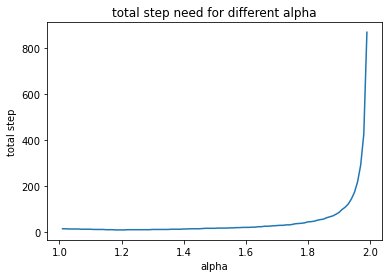

In [7]:
total_step = []
for i in range(1,100):
    _,max_e = fdm_solver(dim_grid,1+0.01*i)
    total_step.append(len(max_e))
print("optimal alpha for N=5 in practice:",1+0.01*np.argmin(total_step))
plt.plot(1+0.01*np.arange(1,100),total_step)
plt.xlabel('alpha')
plt.ylabel('total step')
plt.title('total step need for different alpha')
plt.show()

It's obvious that when $\alpha$ is getting bigger, the convegence situation is getting worse. When $\alpha$ exceed 2, the algorithm could be regarded as divergent. Besides, we can see the optimal $\alpha$ in practice is in correspond with our calculation.

Then, we would like to give a fixed alpha, and have a look at the variation of residual in each step. Here we take $alpha$ to be 1.1, 1.5, 1.9 respectively. For this purpose, we should modify the FDM solver for a fixed total number of iteration.

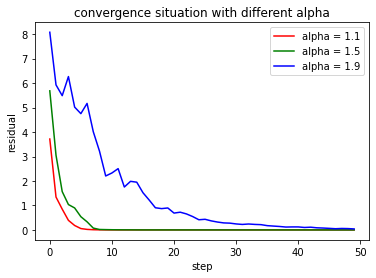

In [8]:
def fdm_solver_fixed_step(dim_grid, it, alpha):
    
    # potential to solve with boudary value
    x = np.zeros([dim_grid,dim_grid])
    x[:,dim_grid-1]=10
    x_old = np.zeros([dim_grid,dim_grid])
    
    # error
    e = np.zeros([dim_grid,dim_grid])
    max_e = []
    
    # SOR
    for k in range(it):
        for i in range(1,dim_grid-1):
            for j in range(1,dim_grid-1):
                x_old[i,j] = x[i,j]
                x[i,j] = x[i,j]+0.25*alpha*(x[i,j+1]+x[i,j-1]+x[i+1,j]+x[i-1,j]-4*x[i,j])
                e[i,j] = np.abs(x[i,j]-x_old[i,j])
        max_e.append(np.amax(e))
    return max_e

# total iteration number
it = 50

e1 = fdm_solver_fixed_step(dim_grid,it,1.1)
e2 = fdm_solver_fixed_step(dim_grid,it,1.5)
e3 = fdm_solver_fixed_step(dim_grid,it,1.9)

#plot 
plt.plot(list(range(it)),e1[:it],'r',label='alpha = 1.1')
plt.plot(list(range(it)),e2[:it],'g',label='alpha = 1.5')
plt.plot(list(range(it)),e3[:it],'b',label='alpha = 1.9')
plt.xlabel('step')
plt.ylabel('residual')
plt.title('convergence situation with different alpha')
plt.legend()
plt.show()

From this result, we can clearly see that for an inappropriate $\alpha$, not only the converging rate is slow, but also the residual will oscillate, which gives a bad performance of FDM. 

## Summary
FDM, serving as a numerical method for PDE solution, is of great use in solving electrostatic field or magnetostatic field. The main step of FDM can be concluded as:
- discrete the region of interests
- derive the finite-differential form of target PDE, with also boundary condition
- solve using SOR

The choice of relaxation factor has a great influence on the convergence situation of the algorithm. Usually with complicated boundary, we can only choose the relaxation factor empirically. Therefore, FDM is not a very robust algorithm. In contrast, FEM is much more complex but without the dependence of relaxation factor, thus more widely used.